# 다중분류

**다중 분류**
- Y가 범주이고, 범주가 3개 이상
- Y값에 대한 <span style="color:palevioletred">**전처리**</span>와 <span style="color:palevioletred">**Loss Function**</span>

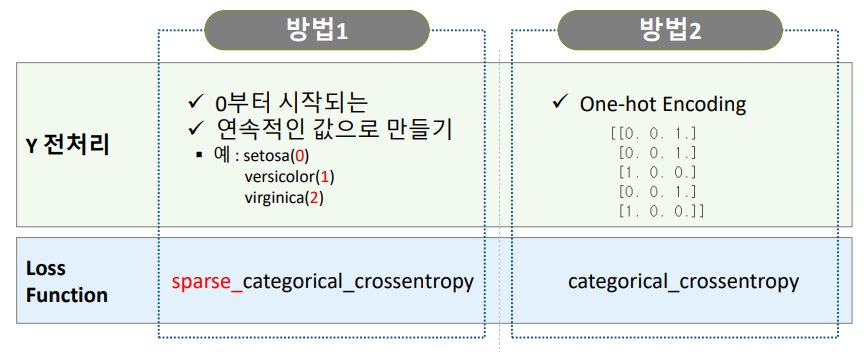

**Node 수**
- 다중분류 모델에서 output layer의 <span style="color:palevioletred">**node 수**</span>는 <span style="color:palevioletred">**y의 범주 수**</span>와 같습니다.

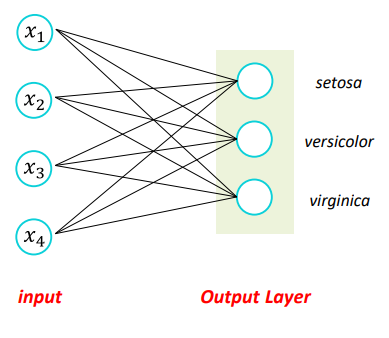

**Sofrmax**
- 각 class별(output node)로 예측한 값을, 하나의 확률 값으로 

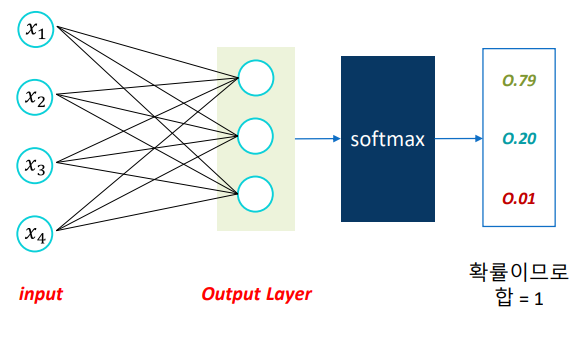

**`다중 분류 요약`**
- 1) y값 전처리 필요
    - y값을 0,1,2...로 만들고, <span style="color:palevioletred">**loss='sparse_categorical_crossentropy'**</span>
    - y값을 one-hot encoding하고, <span style="color:palevioletred">**loss='categorical_crossentropy'**</span>

- 2) Output Layer의 Activation
    - <span style="color:palevioletred">**softmax**</span> : 0~1 사이 확률 값으로 변환해주는 역할
    
    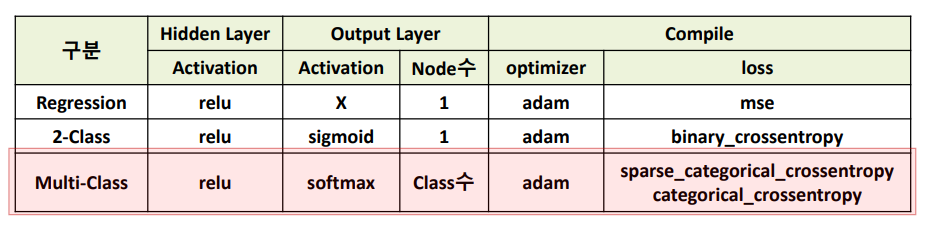


$ $

$ $

##### cf) `argmax()`

- 배열에서 가장 큰 수를 가진 차원을 찾는 것

In [7]:
# np.argmax()
a = np.array([[0.1, 0.8, 0.1],
              [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3],
              [0.8, 0.1, 0.1]])
a

array([[0.1, 0.8, 0.1],
       [0.3, 0.1, 0.6],
       [0.2, 0.5, 0.3],
       [0.8, 0.1, 0.1]])

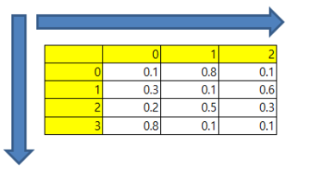

In [8]:
np.argmax(a, axis=0)  

#  axis=0 옵션으로 n열에 대해 행끼리 비교해서 큰 차원을 추출
      
# 1열(0번째 자리)에서 가장 큰 값은 0.8(4행, 차원3) ==> 3                       
# 2열(1번째 자리)에서 가장 큰 값은 0.8(1행, 차원0) ==> 0
# 3열(2번째 자리)에서 가장 큰 값은 0.6(2행, 차원1) ==> 1 
#                  ===> [3, 0, 1]

array([3, 0, 1], dtype=int64)

In [9]:
np.argmax(a, axis=1)    # [2, 0]

#  axis=1 옵션으로 n행에 대해 열끼리 비교해서 큰 차원을 추출
      
# 1행(0차원)에서 가장 큰 값은 0.8(2열, 차원1) ==> 1                       
# 2행(1차원)에서 가장 큰 값은 0.6(3열, 차원2) ==> 2   
# 3행(2차원)에서 가장 큰 값은 0.5(2열, 차원1) ==> 1   
# 4행(3차원)에서 가장 큰 값은 0.8(1열, 차원0) ==> 0   
#                  ===> [1, 2, 1, 0]

array([1, 2, 1, 0], dtype=int64)

$ $

$ $

**라이브러리 불러오기**

In [1]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam


**함수 만들기**

In [23]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

---

# 1. 다중 분류: iris
- loss='sparse_categorical_crossentropy'

### 1) 데이터 준비

In [12]:
# 데이터 불러오기

path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**y값을 0,1,2로 변환하기**
- sparse_catergorical_crossentropy를 위해

In [13]:
# 데이터 준비 'setosa':0, 'versicolor':1, 'virginica':2 로 변환
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# target 설정, x,y 나누기
target = 'Species'
x = data.drop(target, axis=1)
y = data.loc[:,target]

In [15]:
# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

In [16]:
# scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### 2) 모델링

In [18]:
# 모델 설계
n = x_train.shape[1]
n

4

In [19]:
# 데이터 정리
clear_session()

# Sequentail
model = Sequential([Dense(3, input_shape=(n,), activation='softmax')])

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compile
model.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy')

# 학습
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2).history


Epoch 1/50
3/3 [==============================] - 1s 108ms/step - loss: 1.1506 - val_loss: 1.0793
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.9804 - val_loss: 0.8825
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.8707 - val_loss: 0.7690
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.7701 - val_loss: 0.6978
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6803 - val_loss: 0.6798
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6279 - val_loss: 0.6507
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.5819 - val_loss: 0.5878
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 0.5367 - val_loss: 0.5290
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 0.5105 - val_loss: 0.4913
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 0.4920 - val_loss: 0.4782
Epoch 11/50
3/3 [===========

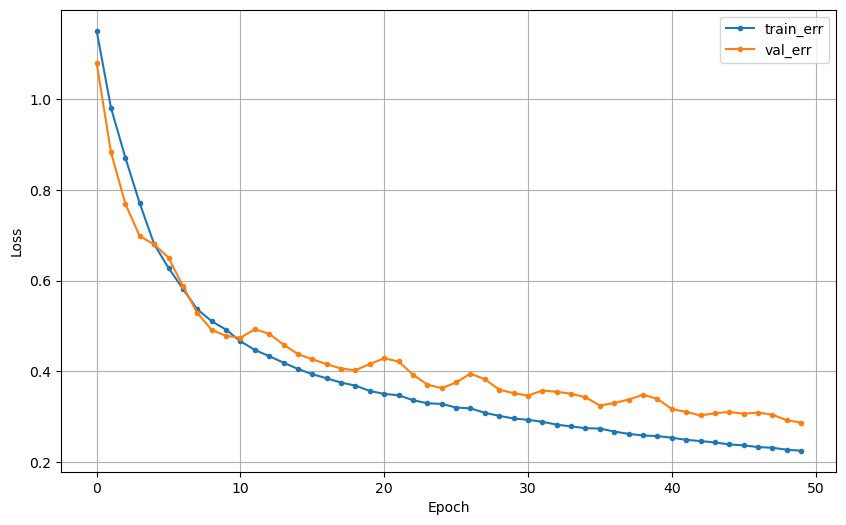

In [24]:
# 학습결과 그래프
dl_history_plot(hist)

### 3) 예측 및 검증

- 예측 결과는 <span style="color:palevioletred">**softmax**</span>로 변환된 값.

In [25]:
# 예측 
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 6ms/step


array([[9.7302353e-01, 2.6680423e-02, 2.9606748e-04],
       [9.9141055e-01, 8.5107218e-03, 7.8703044e-05],
       [2.5051288e-04, 4.9571410e-02, 9.5017803e-01],
       [7.3413655e-02, 7.2649324e-01, 2.0009312e-01],
       [9.9143147e-01, 8.5045360e-03, 6.3897693e-05]], dtype=float32)

- 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환.

In [26]:
pred = pred.argmax(axis=1)
pred

array([0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1,
       2], dtype=int64)

In [28]:
# 실제 y_val 값은 0,1,2로 된 1차원 값.
y_val

18     0
19     0
100    2
88     1
46     0
50     1
41     0
103    2
72     1
23     0
143    2
132    2
34     0
61     1
10     0
53     1
102    2
12     0
26     0
89     1
16     0
144    2
27     0
33     0
140    2
78     1
9      0
120    2
66     1
48     0
0      0
134    2
110    2
116    2
82     1
118    2
70     1
71     1
97     1
81     1
139    2
21     0
101    2
55     1
108    2
Name: Species, dtype: int64

In [29]:
# 검증
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[16  0  0]
 [ 0 13  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



$ $

$ $

---

# 2. Hidden layer 1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [30]:
# 모델 설계
n = x_train.shape[1]

# 메모리정리
clear_session()

# Sequential
model1 = Sequential([Dense(8, input_shape=(n,), activation='relu'),
                     Dense(3, activation='softmax')])
# 모델 요약
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [32]:
# compile
model1.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy')

# 학습
hist1 = model1.fit(x_train, y_train, epochs=50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 99ms/step - loss: 1.1271 - val_loss: 1.1149
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 1.0906 - val_loss: 1.0741
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 1.0479 - val_loss: 0.9921
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.9641 - val_loss: 0.8978
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 0.8451 - val_loss: 0.7623
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.7428 - val_loss: 0.6428
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6815 - val_loss: 0.5547
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6069 - val_loss: 0.5377
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 0.5399 - val_loss: 0.5455
Epoch 10/50
3/3 [==============================] - 0s 18ms/step - loss: 0.5154 - val_loss: 0.5072
Epoch 11/50
3/3 [============

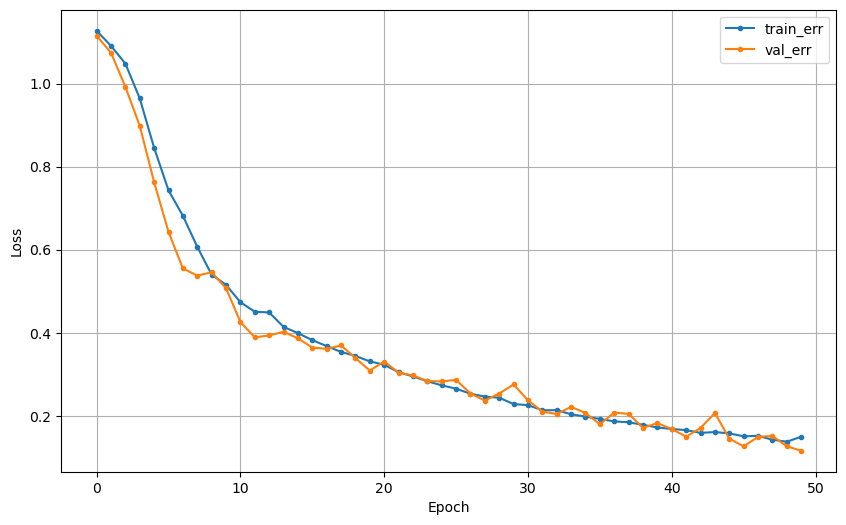

In [34]:
# 학습결과 그래프
dl_history_plot(hist1)

In [37]:
# 예측
pred1 = model1.predict(x_val)
pred1 = pred1.argmax(axis=1)

# 검증
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

2/2 [==============================] - 0s 3ms/step
[[16  0  0]
 [ 0 12  2]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.86      0.92        14
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



---

# 3. Hidden Layer 2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [38]:
# 모델 설계
n = x_train.shape[1]

# 메모리정리
clear_session()

# Sequential
model2 = Sequential([Dense(8, input_shape=(n,), activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(3, activation='softmax')])
# 모델 요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [39]:
# compile
model2.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy')

# 학습
hist2 = model2.fit(x_train, y_train, epochs=50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 83ms/step - loss: 1.0805 - val_loss: 0.9103
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 0.8430 - val_loss: 0.5616
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 0.5762 - val_loss: 0.4193
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.4765 - val_loss: 0.5109
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 0.4111 - val_loss: 0.2902
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.3070 - val_loss: 0.2967
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2270 - val_loss: 0.1771
Epoch 8/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1707 - val_loss: 0.0987
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 0.1700 - val_loss: 0.0805
Epoch 10/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2581 - val_loss: 0.0814
Epoch 11/50
3/3 [============

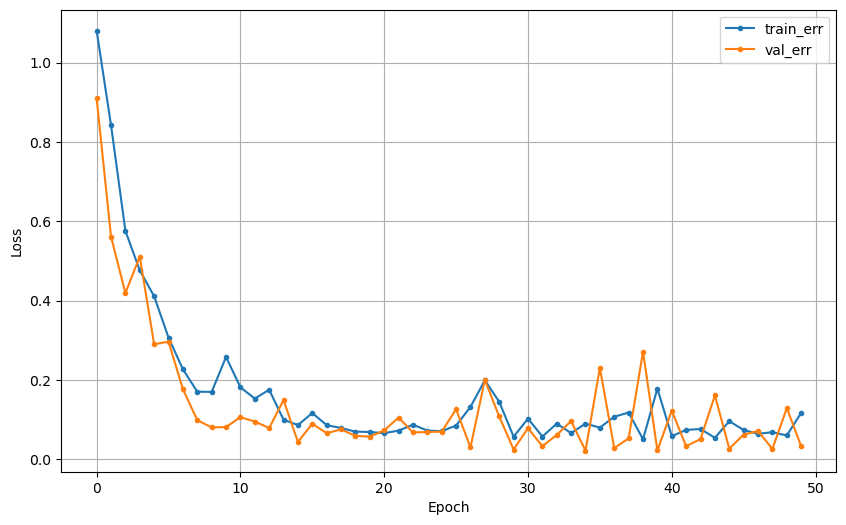

In [40]:
# 학습결과 그래프
dl_history_plot(hist2)

In [41]:
# 예측
pred2 = model2.predict(x_val)
pred2 = pred2.argmax(axis=1)

# 검증
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))

2/2 [==============================] - 0s 3ms/step
[[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



$ $

$ $

---

# 4. 연습: wine

**데이터 불러오기**

In [42]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [43]:
data['quality'].value_counts()

2    2198
1    1457
3     880
0     183
4     180
Name: quality, dtype: int64

**데이터 준비**

In [44]:
# target 설정, x,y 나누기
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]


# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= 0.3)

# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)


**모델링1**
- 은닉층 0
- epochs=50, lr=0.1

In [45]:
# 모델 설계
n = x_train.shape[1]

clear_session()
model1 = Sequential([Dense(5, input_shape=(n,), activation='softmax')])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 60        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [46]:
# compile
model1.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy')

# 학습
hist1 = model1.fit(x_train, y_train, epochs=50, validation_split=0.2).history

Epoch 1/50
86/86 [==============================] - 1s 4ms/step - loss: 1.1968 - val_loss: 1.1495
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 1.1232 - val_loss: 1.1312
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 1.1061 - val_loss: 1.1009
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 1.0933 - val_loss: 1.1076
Epoch 5/50
86/86 [==============================] - 0s 2ms/step - loss: 1.0864 - val_loss: 1.0946
Epoch 6/50
86/86 [==============================] - 0s 2ms/step - loss: 1.0892 - val_loss: 1.1238
Epoch 7/50
86/86 [==============================] - 0s 2ms/step - loss: 1.0832 - val_loss: 1.1149
Epoch 8/50
86/86 [==============================] - 0s 2ms/step - loss: 1.0788 - val_loss: 1.1212
Epoch 9/50
86/86 [==============================] - 0s 2ms/step - loss: 1.0848 - val_loss: 1.1132
Epoch 10/50
86/86 [==============================] - 0s 2ms/step - loss: 1.0857 - val_loss: 1.1220
Epoch 11/50
86/86 [

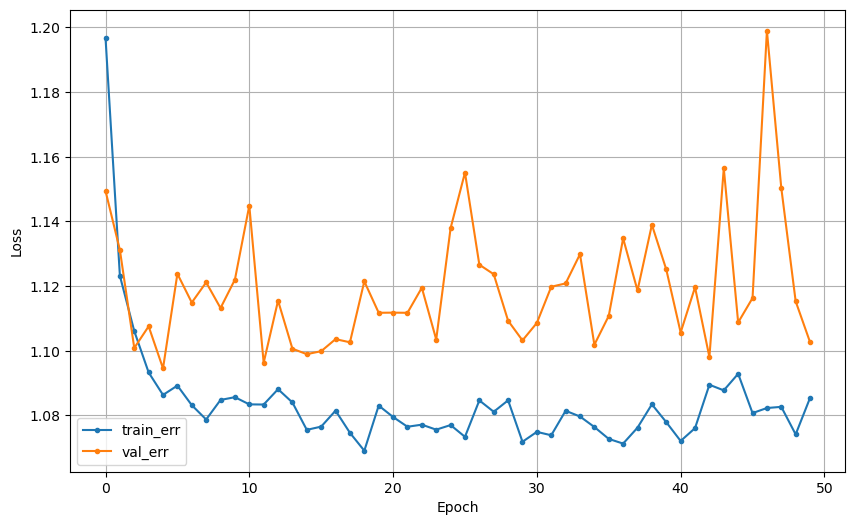

In [47]:
# 학습결과 그래프 
dl_history_plot(hist1)

In [49]:
# 예측 및 검증
pred1 = model1.predict(x_val)

pred1 = pred1.argmax(axis=1)

print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

46/46 [==============================] - 0s 1ms/step
[[  4  20  27   0   0]
 [  4 167 289   1   0]
 [  1  68 535  30   0]
 [  0   3 204  51   0]
 [  0   1  49  16   0]]
              precision    recall  f1-score   support

           0       0.44      0.08      0.13        51
           1       0.64      0.36      0.46       461
           2       0.48      0.84      0.62       634
           3       0.52      0.20      0.29       258
           4       0.00      0.00      0.00        66

    accuracy                           0.51      1470
   macro avg       0.42      0.30      0.30      1470
weighted avg       0.52      0.51      0.47      1470



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# 정확도 0.52로 성능이 좋다고 말할 수 없음.
# 학습결과 그래프를 보면 검증데이터 오차의 분산이 큼
# epochs를 늘려도 큰 차이가 없을 것으로 보임
# learning_rate의 조절이 필요해 보임